In [18]:
#Alex Netzley
#2/17/2024

import torch
import torchvision
#from torchinfo import summary
import scipy
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
from train import train_model

In [3]:

# Define transforms for preprocessing
trans = transforms.Compose([
    transforms.Resize(256),   # Resize the image to 256x256
    transforms.CenterCrop(224),  # Crop the center 224x224 portion of the image
    transforms.ToTensor(),    # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image (ImageNet RGB means)
])

Import Aircraft

In [16]:
aircraft_dataset = torchvision.datasets.FGVCAircraft(root='data/FGVCAircraft_dataset', split='train', transform=trans, download=True)
aircraft_val_dataset = torchvision.datasets.FGVCAircraft(root='data/FGVCAircraft_dataset', split='val', transform=trans, download=True)
            
# Select a subset of 1000 random training images
num_samples = 50

subset_indices = torch.randperm(len(aircraft_dataset))[:num_samples]
subset_dataset = Subset(aircraft_dataset, subset_indices)

# Select a subset of 1000 random validation images
valset_indices = torch.randperm(len(aircraft_val_dataset))[:num_samples]
valset_dataset = Subset(aircraft_val_dataset, valset_indices)

# Define data loader
batch_size = 32
train_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)
val_loader =  DataLoader(valset_dataset, batch_size=batch_size, shuffle=True)

dataset_name = "aircraft"

Import Food

In [ ]:
food_dataset = torchvision.datasets.Food101(root='data/Food101_dataset', split='train', transform=trans, download=True)
food_val_dataset = torchvision.datasets.Food101(root='data/Food101_dataset', split='train', transform=trans, download=True)
            
# Select a subset of 1000 random training images
num_samples = 50

subset_indices = torch.randperm(len(food_dataset))[:num_samples]
subset_dataset = Subset(food_dataset, subset_indices)

# Select a subset of 1000 random validation images
valset_indices = torch.randperm(len(food_val_dataset))[:num_samples]
valset_dataset = Subset(food_val_dataset, valset_indices)

# Define data loader
batch_size = 32
train_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)
val_loader =  DataLoader(valset_dataset, batch_size=batch_size, shuffle=True)

dataset_name = "food"

Import Flowers

In [7]:
# we resize and then center crop to remove borders
# https://stackoverflow.com/questions/71341354/cnn-why-do-we-first-resize-the-image-to-256-and-then-center-crop-to-224
# 224 is the expected input for ImageNet models


#Load Flowers102 dataset
flowers_dataset = Flowers102(root="./data/Flowers102_dataset", split='train', transform=trans, download=True)
fowers_val_dataset = Flowers102(root="./data/Flowers102_dataset", split='val', transform=trans, download=True)

# Select a subset of 1000 random training images
num_samples = 1000

subset_indices = torch.randperm(len(flowers_dataset))[:num_samples]
subset_dataset = Subset(flowers_dataset, subset_indices)

# Select a subset of 1000 random validation images
valset_indices = torch.randperm(len(flowers_val_dataset))[:num_samples]
valset_dataset = Subset(flowers_val_dataset, valset_indices)

# Define data loader
batch_size = 32
train_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True)
val_loader =  DataLoader(valset_dataset, batch_size=batch_size, shuffle=True)

dataset_name = "flowers"

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>

Defining a data variable that stores the dataloader, dataname, etc.

Main Code

In [19]:
trained_model, training_log  = train_model(lr=0.001, 
                                           num_epochs = 5, 
                                           num_samples = num_samples,
                                           dataset_name = dataset_name, 
                                           train_loader = train_loader, 
                                           val_loader = val_loader)

Epoch 1/5
----------


100%|██████████| 2/2 [00:07<00:00,  3.83s/it]


Training Loss: 4.6281


Validation Loss: 4.6153, Validation Accuracy: 0.0000
Epoch 2/5
----------


100%|██████████| 2/2 [00:08<00:00,  4.11s/it]


Training Loss: 4.4556


Validation Loss: 4.6191, Validation Accuracy: 0.0200
Epoch 3/5
----------


100%|██████████| 2/2 [00:07<00:00,  3.64s/it]


Training Loss: 4.3711


Validation Loss: 4.6215, Validation Accuracy: 0.0200
Epoch 4/5
----------


100%|██████████| 2/2 [00:07<00:00,  3.74s/it]


Training Loss: 4.0307


Validation Loss: 4.6202, Validation Accuracy: 0.0000
Epoch 5/5
----------


100%|██████████| 2/2 [00:07<00:00,  3.83s/it]


Training Loss: 4.0324


Validation Loss: 4.6211, Validation Accuracy: 0.0000


ValueError: x and y must have same first dimension, but have shapes (20,) and (5,)

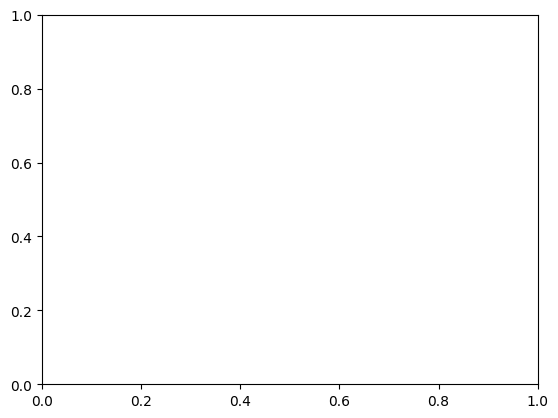

In [20]:

num_epochs = 20
train_losses, val_losses, val_accs = training_log
plt.plot(np.arange(num_epochs), train_losses)
plt.plot(np.arange(num_epochs), val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()

plt.plot(np.arange(num_epochs), val_accs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

np.max(val_accs)